In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import nltk
import math
import pickle

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from Bio.SeqUtils.ProtParam import ProteinAnalysis
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


%matplotlib inline

import itertools 
from collections import Counter


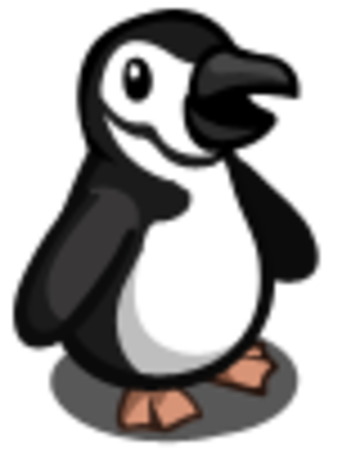

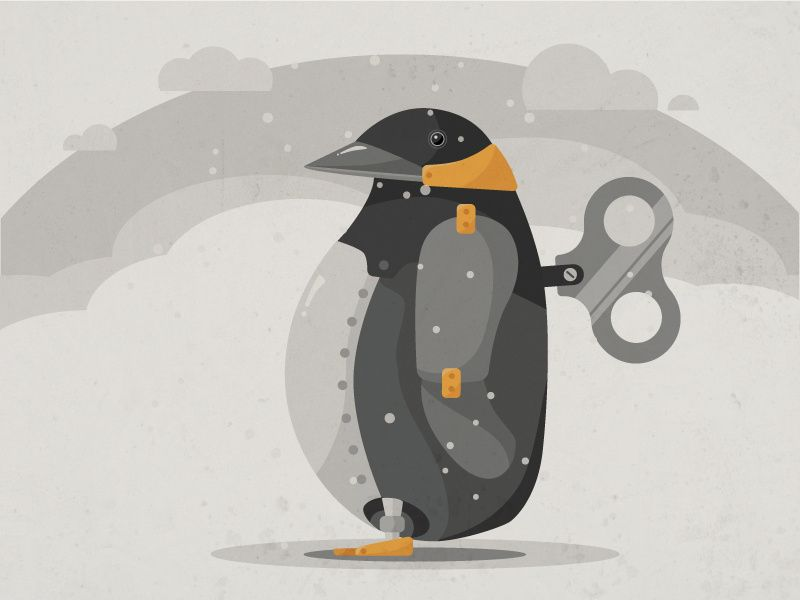

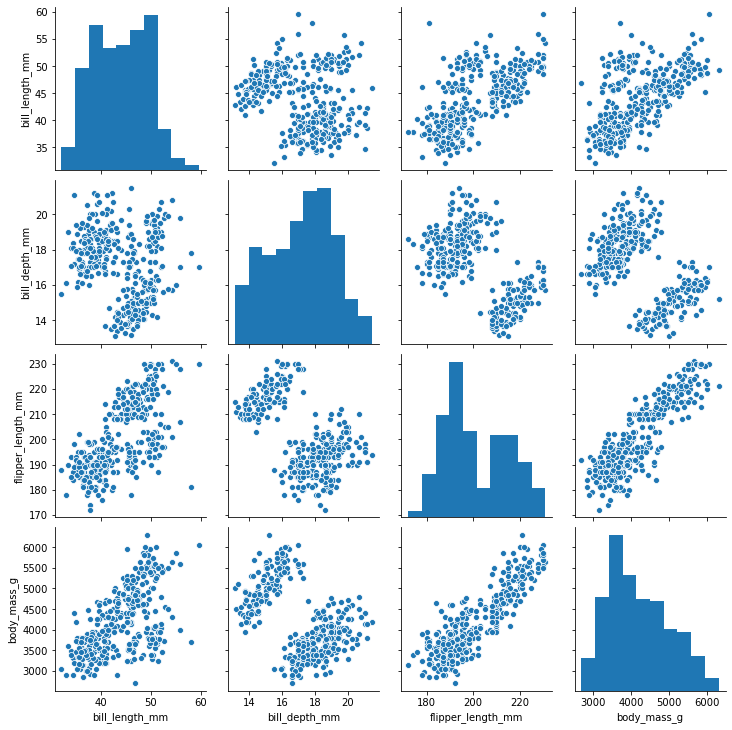

In [2]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

In [3]:
print(type(penguins))

<class 'pandas.core.frame.DataFrame'>


In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins.shape

(344, 7)

In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [8]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
# impute missing values with mean values for each columns
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna((penguins['bill_length_mm'].mean()))
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna((penguins['bill_depth_mm'].mean()))
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna((penguins['flipper_length_mm'].mean()))
penguins['body_mass_g'] = penguins['body_mass_g'].fillna((penguins['body_mass_g'].mean()))

In [10]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [11]:
penguins.groupby(['species']).body_mass_g.mean()

species
Adelie       3703.958910
Chinstrap    3733.088235
Gentoo       5068.965761
Name: body_mass_g, dtype: float64

In [12]:
penguins.groupby(['species','island']).body_mass_g.mean()

species    island   
Adelie     Biscoe       3709.659091
           Dream        3688.392857
           Torgersen    3715.899123
Chinstrap  Dream        3733.088235
Gentoo     Biscoe       5068.965761
Name: body_mass_g, dtype: float64

In [13]:
penguins.groupby(['species','island','sex']).body_mass_g.mean()

species    island     sex   
Adelie     Biscoe     FEMALE    3369.318182
                      MALE      4050.000000
           Dream      FEMALE    3344.444444
                      MALE      4045.535714
           Torgersen  FEMALE    3395.833333
                      MALE      4034.782609
Chinstrap  Dream      FEMALE    3527.205882
                      MALE      3938.970588
Gentoo     Biscoe     FEMALE    4679.741379
                      MALE      5484.836066
Name: body_mass_g, dtype: float64

In [14]:
penguins.groupby(['species','sex']).body_mass_g.mean()

species    sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: body_mass_g, dtype: float64

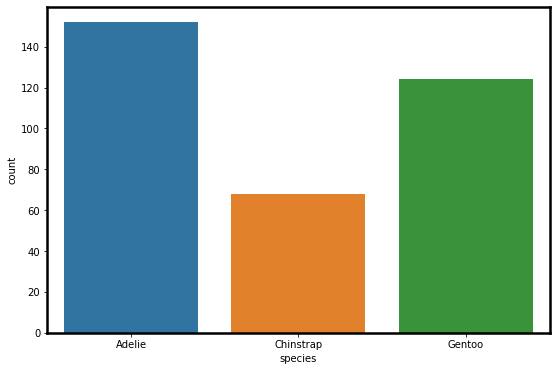

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.countplot(x="species", data=penguins)

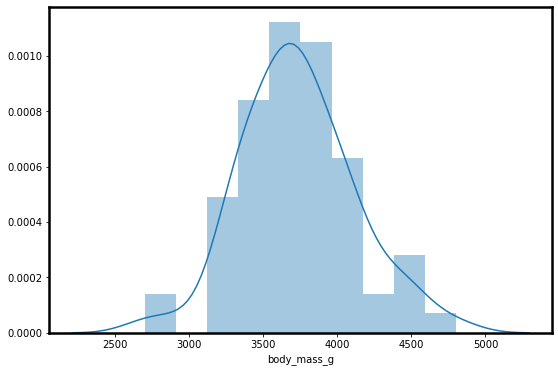

In [16]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.distplot(penguins[penguins['species'] == 'Chinstrap'].body_mass_g)

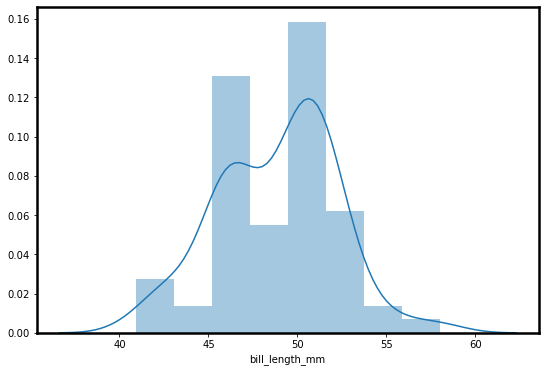

In [17]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.distplot(penguins[penguins['species'] == 'Chinstrap'].bill_length_mm) #'bill_length_mm'

In [18]:
print('Mean bill length in mm for Chinstrap')
print(np.mean(penguins[penguins['species'] == 'Chinstrap'].bill_length_mm))
print()
print('Mean bill length in mm for Chinstrap')
print(np.std(penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm))

Mean bill length in mm for Chinstrap
48.83382352941177

Mean bill length in mm for Chinstrap
7.079259633253841


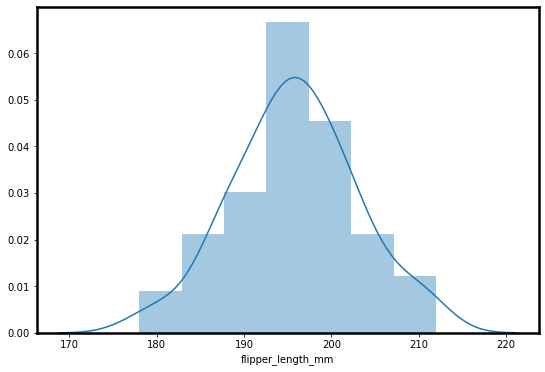

In [19]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.distplot(penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm) # 'flipper_length_mm'

In [20]:
penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm.mean()

195.8235294117647

In [21]:
print(np.mean(penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm))

195.8235294117647


In [22]:
print(np.std(penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm))

7.079259633253841


## Synthetic Data

In [23]:
sample_size = 200

mu, sigma = np.mean(penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm),np.std(penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm)  # mean and standard deviation
chinstrap_flipper_data = np.random.normal(mu, sigma,sample_size)

print(chinstrap_flipper_data)


[198.62301065 196.77258855 192.86695126 198.81890207 203.20948756
 204.52752291 193.68775341 205.16021026 201.59949719 199.146035
 193.51193806 194.20075486 195.92002635 198.54983317 200.1684622
 193.02546016 206.97215586 185.01889393 196.35916311 189.38800862
 200.59571587 196.28334967 192.47538441 202.52318263 212.45992644
 204.3648367  213.93960999 196.13898295 192.51015181 207.88306079
 189.5398528  188.28248668 189.48102182 191.58596502 190.40730307
 187.12969344 191.34375925 213.67634021 190.30465697 195.33127009
 181.71995522 199.17858612 186.72701402 202.55094079 198.99474112
 193.9023265  202.96097083 202.55651754 189.7413467  183.00025277
 201.87388974 206.03740863 196.24350641 200.70995239 187.06338498
 198.71146693 198.08025426 191.06223316 194.77281049 194.90955863
 201.56699476 186.24461868 199.81075868 203.11136886 211.27257627
 199.85919263 193.47175785 207.32845326 211.03222101 192.8468296
 198.773015   198.54109442 201.22962378 202.26991959 192.2686756
 190.74199878 1

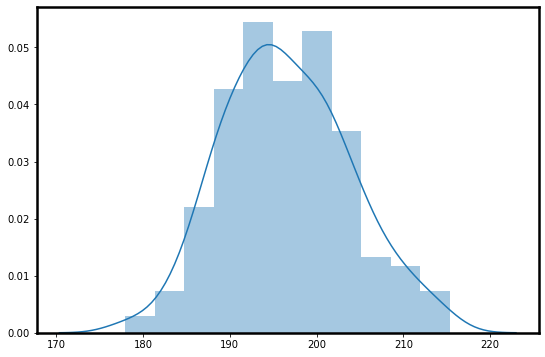

In [24]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.distplot(chinstrap_flipper_data)

In [25]:
mu_bill, sigma_bill = np.mean(penguins[penguins['species'] == 'Chinstrap'].bill_length_mm),np.std(penguins[penguins['species'] == 'Chinstrap'].bill_length_mm)  # mean and standard deviation
chinstrap_bill_length_data = np.random.normal(mu_bill, sigma_bill, sample_size)

print(chinstrap_bill_length_data)

[50.01324255 54.40069916 52.46951773 50.52639251 47.93268351 47.8414219
 51.42928042 52.17022367 51.16720692 55.85479481 47.85543289 50.11593502
 47.7440124  52.43642393 41.93631689 43.8712428  49.54228521 50.14386642
 45.39235473 53.8929464  46.80553472 47.65982988 49.44994709 50.15467456
 46.87117484 44.84762871 51.45843879 44.83932746 43.35481353 47.39701289
 47.69093589 51.48677999 45.42289788 48.78817313 47.12027474 53.30309563
 49.73147986 50.38630335 50.25017614 50.9471565  51.48542377 49.21559664
 51.21982434 44.28861529 52.54250801 49.86106287 47.1173012  51.20525368
 46.12884828 51.32690293 48.86896887 55.96995098 46.5081111  53.87150498
 47.2317597  50.33263193 48.17282929 44.44156765 53.72480456 49.15232974
 50.46579499 52.81942636 45.08672826 47.8874269  45.82007132 47.66055601
 46.6054054  51.24139983 48.35101547 48.41712859 54.7248892  46.72077123
 46.49085161 49.63015923 51.89108331 46.85914387 53.60646687 45.84572882
 46.46815275 53.65546363 55.30029665 47.45778032 44.

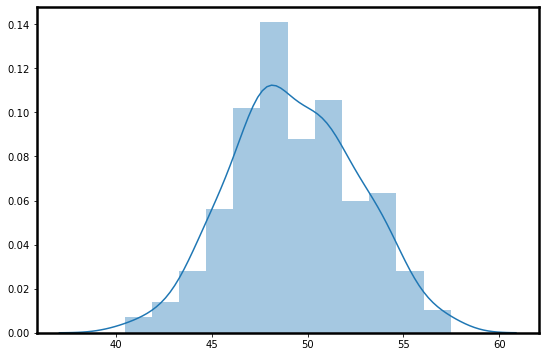

In [26]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.distplot(chinstrap_bill_length_data)

In [27]:
mu_body, sigma_body = np.mean(penguins[penguins['species'] == 'Chinstrap'].body_mass_g),np.std(penguins[penguins['species'] == 'Chinstrap'].body_mass_g)  # mean and standard deviation
chinstrap_body_mass_data = np.random.normal(mu_body, sigma_body, sample_size)

print(chinstrap_body_mass_data)

[3240.88946268 3317.07916923 3183.85559652 3693.74784976 4100.60773342
 4055.38157509 3775.00228935 3996.2992174  4131.23444871 3111.78090526
 3994.35252114 3851.69186656 3584.18204652 3879.74626833 3508.00217338
 3727.61389689 4000.24232005 3540.56329799 3142.12707809 4429.55907351
 3968.41424896 3836.34466484 4018.7518285  4185.43256354 3844.3882524
 4264.75629436 3797.29398402 4111.86383967 3419.63369967 3364.24568832
 3763.81771299 3848.37354924 3956.38814208 3482.5490447  3826.89859391
 3675.49116136 3921.97054066 3119.87864428 3699.59041404 3972.51064016
 3881.23810845 3077.72327878 4192.10926296 3834.13760452 3751.69547492
 3230.34813516 2904.81792621 4576.19046617 3640.82009949 3972.19214367
 3668.9137906  4273.15705087 3539.508607   3271.89255971 3886.54125791
 3148.97056085 3255.25870847 3487.46464192 3236.6642584  3707.76464432
 3877.88041728 3769.95115168 3444.45326283 3399.36987626 2685.26703268
 3009.41232712 4246.22677395 3413.2839379  3690.7693711  4135.04626408
 3253.7

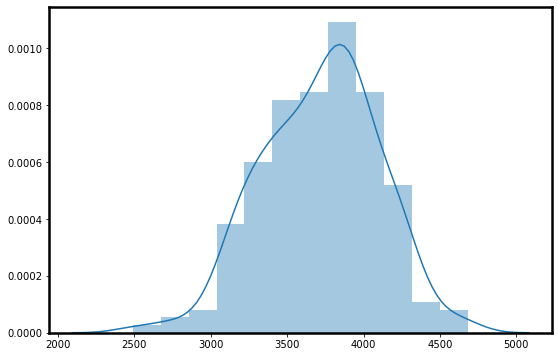

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.distplot(chinstrap_body_mass_data)

In [29]:
penguins.columns

synth_data = {'bill_length_mm':chinstrap_bill_length_data,'flipper_length_mm':chinstrap_flipper_data , \
              'body_mass_g':chinstrap_body_mass_data}

# Create DataFrame 
df_chinstrap_synth = pd.DataFrame(synth_data) 
  
# Print the output. 
df_chinstrap_synth.head() 

,bill_length_mm,body_mass_g,flipper_length_mm
0,50.013243,3240.889463,198.623011
1,54.400699,3317.079169,196.772589
2,52.469518,3183.855597,192.866951
3,50.526393,3693.747850,198.818902
4,47.932684,4100.607733,203.209488


In [30]:
chin_species = []
chin_island = []

for idx in range(len(chinstrap_body_mass_data)):
    chin_species.append('Chinstrap')
    chin_island.append('Dream')


df_chinstrap_synth['species']= chin_species
df_chinstrap_synth['island'] = chin_island
# Print the output. 
df_chinstrap_synth.head() 

,bill_length_mm,body_mass_g,flipper_length_mm,species,island
0,50.013243,3240.889463,198.623011,Chinstrap,Dream
1,54.400699,3317.079169,196.772589,Chinstrap,Dream
2,52.469518,3183.855597,192.866951,Chinstrap,Dream
3,50.526393,3693.747850,198.818902,Chinstrap,Dream
4,47.932684,4100.607733,203.209488,Chinstrap,Dream


In [31]:
df_enhanced = pd.concat([penguins,df_chinstrap_synth])

df_enhanced.head()

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex,species
0,18.70000,39.10000,3750.000000,181.000000,Torgersen,MALE,Adelie
1,17.40000,39.50000,3800.000000,186.000000,Torgersen,FEMALE,Adelie
2,18.00000,40.30000,3250.000000,195.000000,Torgersen,FEMALE,Adelie
3,17.15117,43.92193,4201.754386,200.915205,Torgersen,NaN,Adelie
4,19.30000,36.70000,3450.000000,193.000000,Torgersen,FEMALE,Adelie


In [32]:
df_enhanced.shape

(544, 7)

In [33]:
df_enhanced = df_enhanced.sample(frac= 1.0,random_state=1)

df_enhanced.head()

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex,species
244,13.1,42.900000,5000.000000,215.000000,Biscoe,FEMALE,Gentoo
132,18.5,36.800000,3500.000000,193.000000,Dream,FEMALE,Adelie
167,NaN,53.425204,3876.845266,187.992914,Dream,NaN,Chinstrap
133,18.5,37.500000,4475.000000,199.000000,Dream,MALE,Adelie
138,NaN,56.829992,3697.202989,188.459994,Dream,NaN,Chinstrap


In [34]:
df_enhanced.shape

(544, 7)

In [35]:
df_enhanced.species.value_counts()

Chinstrap    268
Adelie       152
Gentoo       124
Name: species, dtype: int64

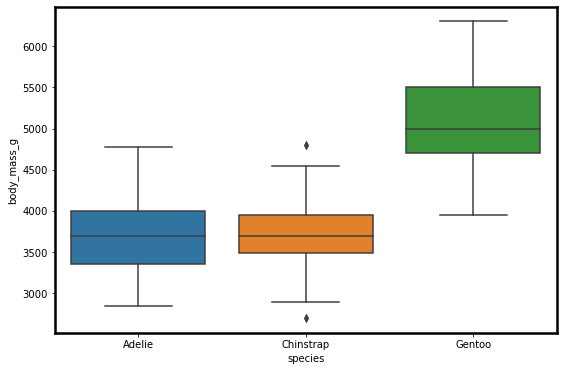

In [36]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.boxplot(x="species", y="body_mass_g", data=penguins)

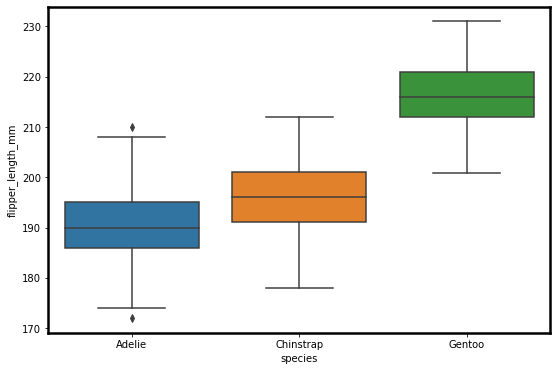

In [37]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.boxplot(x="species", y="flipper_length_mm", data=penguins)

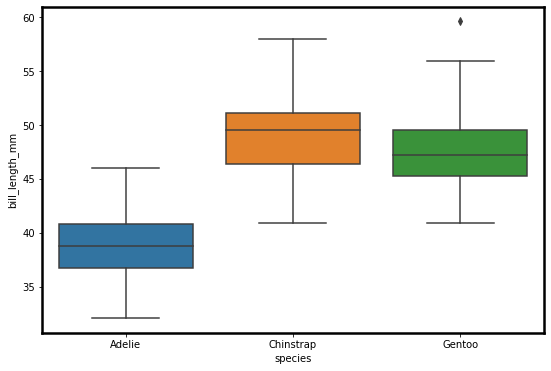

In [38]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    
sns.boxplot(x="species", y="bill_length_mm", data=penguins)

## Classification

In [39]:
#predictors = ['bill_length_mm']
#predictors = ['flipper_length_mm']
#predictors = ['bill_length_mm','body_mass_g']
#predictors = ['bill_length_mm','body_mass_g','flipper_length_mm']
#predictors = ['body_mass_g','flipper_length_mm']
predictors = ['bill_length_mm','flipper_length_mm']
#predictors = ['body_mass_g']
X = df_enhanced[predictors]
y  = df_enhanced.species

# split the data: training & test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print
print(X_test.shape)
print()
# Instantiate Logistic Regression Model
lr = LogisticRegression(random_state = 3)
# build the model using training data
lr.fit(X_train, y_train)
score = lr.score(X_test,y_test)
print(score)

(435, 2)
(109, 2)

0.963302752293578


In [40]:
print(y_test.value_counts())

Chinstrap    55
Gentoo       29
Adelie       25
Name: species, dtype: int64


In [41]:
# Generate Confusion Matrix for Logistic Regression
actual = y_test
predictions = lr.predict(X_test)
print()
cm = confusion_matrix(actual,predictions)
print(cm)


[[25  0  0]
 [ 0 53  2]
 [ 0  2 27]]


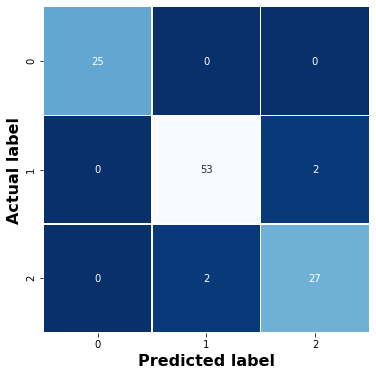

In [42]:
# Confusion matrix for Logistic Regression Model
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r',cbar= None);
plt.ylabel('Actual label',fontsize=16,fontweight='bold');
plt.xlabel('Predicted label',fontsize=16,fontweight='bold');
#plt.savefig('ConfusionMatrix_VotingClassifier_Locations_Model_1.png')

In [43]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        25
   Chinstrap       0.96      0.96      0.96        55
      Gentoo       0.93      0.93      0.93        29

    accuracy                           0.96       109
   macro avg       0.96      0.96      0.96       109
weighted avg       0.96      0.96      0.96       109



In [44]:
X = df_enhanced[predictors]
y  = df_enhanced.species
lr_kfold_model = LogisticRegression(random_state = 3)
kfold = 3
results_kfold = cross_val_score(lr_kfold_model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 


Accuracy: 93.75%


## Adding Homemade Synthetic Data did NOT improve Logistic Regression model accuracy!

## Decision Tree Classifier

In [47]:
predictors = ['bill_length_mm','body_mass_g','flipper_length_mm']
#predictors = ['body_mass_g','flipper_length_mm']
#predictors = ['bill_length_mm','flipper_length_mm']
#predictors = ['body_mass_g']
X = df_enhanced[predictors]
y  = df_enhanced.species

# split the data: training & test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print
print(X_test.shape)
print()

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc.fit(X_train,y_train)

score_dtc = dtc.score(X_test,y_test)
print(score_dtc)


(435, 3)
(109, 3)

0.9174311926605505


In [48]:
# Generate Confusion Matrix for Decision Tree Classifier
actual = y_test
predictions_dtc = dtc.predict(X_test)
print()
cm_dtc = confusion_matrix(actual,predictions_dtc)
print(cm_dtc)


[[29  3  1]
 [ 2 44  2]
 [ 1  0 27]]


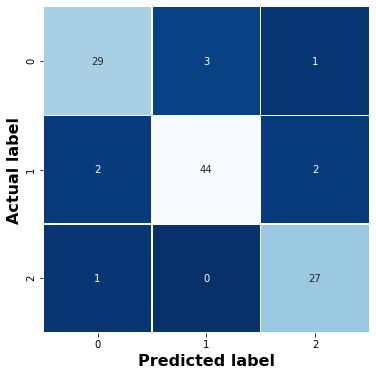

In [49]:
# Confusion matrix for Logistic Regression Model
plt.figure(figsize=(6,6))
sns.heatmap(cm_dtc, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r',cbar= None);
plt.ylabel('Actual label',fontsize=16,fontweight='bold');
plt.xlabel('Predicted label',fontsize=16,fontweight='bold');
#plt.savefig('ConfusionMatrix_VotingClassifier_Locations_Model_1.png')

In [50]:
# cross validation of decision tree classifier
X = df_enhanced[predictors]
y  = df_enhanced.species
dtc_kfold_model = DecisionTreeClassifier()
kfold = 3
results_kfold_dtc = cross_val_score(dtc_kfold_model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold_dtc.mean()*100.0)) 


Accuracy: 93.38%
